## Import my libraries

In [1]:
import scipy
import itertools
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import re
from datetime import datetime
import datetime

## Give size to my visualization

In [2]:
plt.rcParams['figure.figsize'] = (8,6)

## My Dataset

In [3]:
ventas20 = pd.read_csv('/Users/ezequielhoffmann/Desktop/Ironhack/VENTAS 2020 1 - Acumulado.csv')

In [4]:
ventas20['Fecha'] = pd.to_datetime(ventas20.Fecha)

In [5]:
ventas20.head(5)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Venta Neta,IVA,Valor Total,Dirección,Teléfonos,Ciudad,Correo
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,"-134,172.27","-25,492.73","-159,665.00",CL 187 20 85 LC 121 CC PLAZA N,6775800,Bogota D.C.,NaN
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,"29,411.76","5,588.24","35,000.00",CRR 66 #67A-18 JJ VARGAS,2501959,Bogota D.C.,adrianapedraza@hotmail.com
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,"29,411.76","5,588.24","35,000.00",CRR 66 #67A-18 JJ VARGAS,2501959,Bogota D.C.,adrianapedraza@hotmail.com
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,"29,411.76","5,588.24","35,000.00",CRR 66 #67A-18 JJ VARGAS,2501959,Bogota D.C.,adrianapedraza@hotmail.com
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,"29,411.76","5,588.24","35,000.00",CRR 66 #67A-18 JJ VARGAS,2501959,Bogota D.C.,adrianapedraza@hotmail.com


## Cleaning my dataset

In [6]:
ventas20.drop(columns=['Teléfonos', 'Correo', 'Dirección', 'Ciudad', 'IVA', 'Venta Neta'], inplace = True)

In [7]:
ventas20.head(5)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,"-159,665.00"
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,"35,000.00"
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,"35,000.00"
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,"35,000.00"
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,"35,000.00"


In [8]:
ventas20['Valor Total'] = ventas20['Valor Total'].str.replace(',', '').astype(float)

In [9]:
ventas20.head(5)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,-159665.0
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,35000.0
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,35000.0
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,35000.0
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,35000.0


In [10]:
ventas20['Empresa'] = ventas20['Identificación'].str.contains('NIT').astype(int)

In [11]:
ventas20.head(5)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total,Empresa
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,-159665.0,1
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,35000.0,0
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,35000.0,0
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,35000.0,0
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,35000.0,0


In [12]:
ventas20['tallas'] = [re.findall(r'(T\s\d-?\d-?\d?\d?)', str(x)) for x in ventas20['Descripción']]

In [13]:
ventas20['tallas'] = ventas20["tallas"].str[:-1]

In [14]:
ventas20.head(10)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total,Empresa,tallas
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,-159665.0,1,[T 2-3]
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,35000.0,0,[T 12-18]
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18]
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,35000.0,0,[T 12-18]
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18]
5,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CCF3 T 12-18 CABALLO CAFE 3 T 12-18,1.0,35000.0,0,[T 12-18]
6,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,ELM3 T 12-18 ELMO ROJO 3 T 12-18,1.0,35000.0,0,[T 12-18]
7,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,FG3T 12-18 FLORECITAS GRIS 3 T 12-18,1.0,35000.0,0,[T 12-18]
8,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,FLO3 T 12-18 FLOR BEIGE 3 T 12-18,1.0,35000.0,0,[T 12-18]
9,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,HEA3 T 12-18 HELICOPTERO AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18]


In [15]:
ventas20['modelo'] = [re.findall(r'[A-Z]{3,}\ ', str(x)) for x in ventas20['Descripción']]

In [16]:
ventas20.head(10)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total,Empresa,tallas,modelo
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,-159665.0,1,[T 2-3],"[AVION , AZUL ]"
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,35000.0,0,[T 12-18],"[AVION , CAFE ]"
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18],"[AVION , AZUL ]"
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,35000.0,0,[T 12-18],"[BATMAN , NEGRO ]"
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18],"[CARS , AZUL ]"
5,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CCF3 T 12-18 CABALLO CAFE 3 T 12-18,1.0,35000.0,0,[T 12-18],"[CABALLO , CAFE ]"
6,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,ELM3 T 12-18 ELMO ROJO 3 T 12-18,1.0,35000.0,0,[T 12-18],"[ELMO , ROJO ]"
7,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,FG3T 12-18 FLORECITAS GRIS 3 T 12-18,1.0,35000.0,0,[T 12-18],"[FLORECITAS , GRIS ]"
8,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,FLO3 T 12-18 FLOR BEIGE 3 T 12-18,1.0,35000.0,0,[T 12-18],"[FLOR , BEIGE ]"
9,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,HEA3 T 12-18 HELICOPTERO AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18],"[HELICOPTERO , AZUL ]"


In [17]:
ventas20.head(5)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total,Empresa,tallas,modelo
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,-159665.0,1,[T 2-3],"[AVION , AZUL ]"
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,35000.0,0,[T 12-18],"[AVION , CAFE ]"
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18],"[AVION , AZUL ]"
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,35000.0,0,[T 12-18],"[BATMAN , NEGRO ]"
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18],"[CARS , AZUL ]"


In [18]:
ventas20['modelo'] = [','.join(map(str, l)) for l in ventas20['modelo']]

In [19]:
ventas20

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total,Empresa,tallas,modelo
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,-159665.0,1,[T 2-3],"AVION ,AZUL"
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,35000.0,0,[T 12-18],"AVION ,CAFE"
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18],"AVION ,AZUL"
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,35000.0,0,[T 12-18],"BATMAN ,NEGRO"
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,35000.0,0,[T 12-18],"CARS ,AZUL"
...,...,...,...,...,...,...,...,...,...,...,...
4479,PAGINA 132,2020-08-31,FV AV19 41587,CC 43831767,PAULA VELEZ,MA3 T 12-18 MOCACIN AZUL 3 T 12-18,1.0,59000.0,0,[T 12-18],"MOCACIN ,AZUL"
4480,PAGINA 132,2020-08-31,FV AV19 41588,CC 1143344751,KELLY DIAZ,MB4 T 18-24 MOCACIN BEAGE 4 T 18-24,1.0,59000.0,0,[T 18-24],"MOCACIN ,BEAGE"
4481,PAGINA 132,2020-08-31,FV AV19 41589,CC 52743178,MERCEDES VARGAS,CAS5 T 2-3 CABALLO AZUL SUELA 5 T 2-3,1.0,69000.0,0,[T 2-3],"CABALLO ,AZUL ,SUELA"
4482,PAGINA 132,2020-08-31,FV AV19 41589,CC 52743178,MERCEDES VARGAS,MMS 5 T 2-3 MOCACIN MIEL SUELA 5 T 2-3,1.0,69000.0,0,[T 2-3],"MMS ,MOCACIN ,MIEL ,SUELA"


In [20]:
ventas20['tallas'] = [','.join(map(str, l)) for l in ventas20['tallas']]
ventas20.head(10)

,CCosto,Fecha,Documento,Identificación,Cliente,Descripción,Cantidad,Valor Total,Empresa,tallas,modelo
0,PRINCIPAL 101,2020-01-18,DMC FE 1,NIT 860030478,LOS TRES ELEFANTES S.A,AZ5 T 2-3 AVION AZUL 5 T 2-3,-5.0,-159665.0,1,T 2-3,"AVION ,AZUL"
1,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AC3 T 12-18 AVION CAFE 3 T 12-18,1.0,35000.0,0,T 12-18,"AVION ,CAFE"
2,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,AZ3 T 12-18 AVION AZUL 3 T 12-18,1.0,35000.0,0,T 12-18,"AVION ,AZUL"
3,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,BNG3 T 12-18 BATMAN NEGRO 3 T 12-18,1.0,35000.0,0,T 12-18,"BATMAN ,NEGRO"
4,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CAR3 T 12-18 CARS AZUL 3 T 12-18,1.0,35000.0,0,T 12-18,"CARS ,AZUL"
5,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,CCF3 T 12-18 CABALLO CAFE 3 T 12-18,1.0,35000.0,0,T 12-18,"CABALLO ,CAFE"
6,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,ELM3 T 12-18 ELMO ROJO 3 T 12-18,1.0,35000.0,0,T 12-18,"ELMO ,ROJO"
7,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,FG3T 12-18 FLORECITAS GRIS 3 T 12-18,1.0,35000.0,0,T 12-18,"FLORECITAS ,GRIS"
8,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,FLO3 T 12-18 FLOR BEIGE 3 T 12-18,1.0,35000.0,0,T 12-18,"FLOR ,BEIGE"
9,PRINCIPAL 101,2020-01-21,FV FE 55,CC 52333768,LUZ ADRIANA PEDRAZA APONTE,HEA3 T 12-18 HELICOPTERO AZUL 3 T 12-18,1.0,35000.0,0,T 12-18,"HELICOPTERO ,AZUL"


In [21]:
dataparse = lambda Fecha: datetime.strptime(Fecha, '%Y-')

In [22]:
pd.date_range(start = '2020-01-01', freq = 'W', periods = 10)

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08'],
              dtype='datetime64[ns]', freq='W-SUN')

## My visualizations

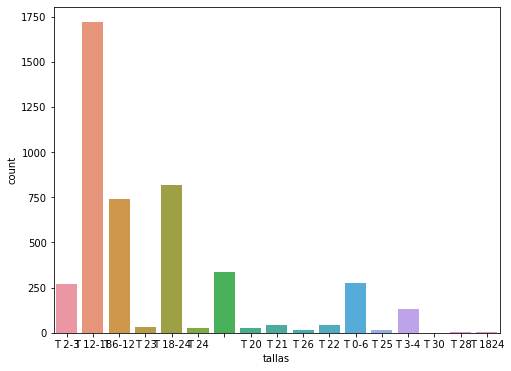

In [23]:
sns.countplot(ventas20['tallas'])

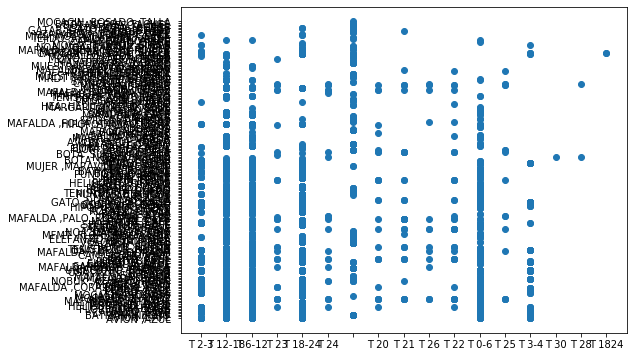

In [24]:
plt.scatter(ventas20.tallas, ventas20.modelo)

In [25]:
ventas20.groupby('tallas').sum().sort_values('Cantidad',ascending=False)

,Cantidad,Valor Total,Empresa
tallas,,,
T 12-18,1683.0,95259711.96,42
T 18-24,806.0,46411924.68,28
T 6-12,691.0,38154526.59,33
,320.0,21370120.24,6
T 2-3,263.0,15612866.53,2
T 0-6,252.0,13681389.52,25
T 3-4,124.0,7215322.49,0
T 22,42.0,3688030.25,0
T 21,35.0,2991321.00,0


In [26]:
ventas20.groupby('tallas').sum()

,Cantidad,Valor Total,Empresa
tallas,,,
,320.0,21370120.24,6
T 0-6,252.0,13681389.52,25
T 12-18,1683.0,95259711.96,42
T 18-24,806.0,46411924.68,28
T 1824,2.0,138000.00,0
T 2-3,263.0,15612866.53,2
T 20,25.0,2181630.25,0
T 21,35.0,2991321.00,0
T 22,42.0,3688030.25,0


In [27]:
ventas20.dtypes

CCosto                    object
Fecha             datetime64[ns]
Documento                 object
Identificación            object
Cliente                   object
Descripción               object
Cantidad                 float64
Valor Total              float64
Empresa                    int64
tallas                    object
modelo                    object
dtype: object

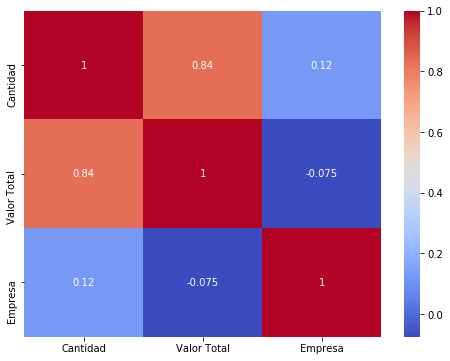

In [28]:
sns.heatmap(ventas20.corr(), cmap='coolwarm', annot = True)

In [29]:
ventas20["Valor Total"] = ventas20["Valor Total"].astype('float')

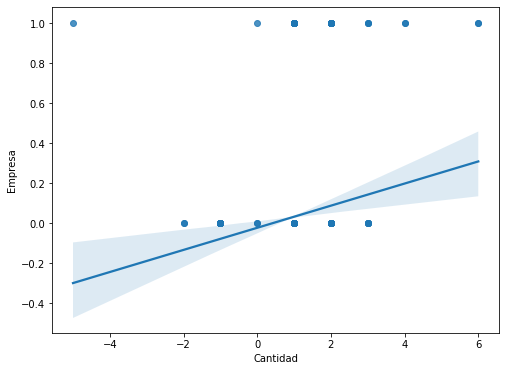

In [30]:
sns.regplot(x='Cantidad', y='Empresa', data=ventas20)

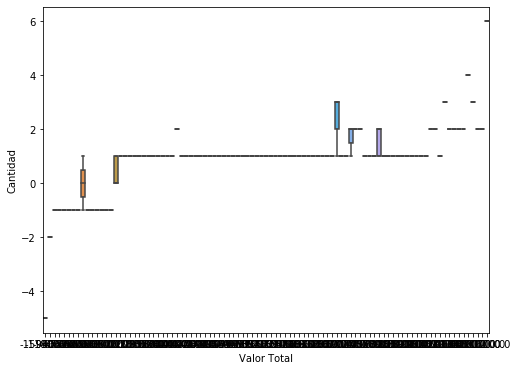

In [31]:
sns.boxplot(x = 'Valor Total', y = 'Cantidad', data = ventas20)

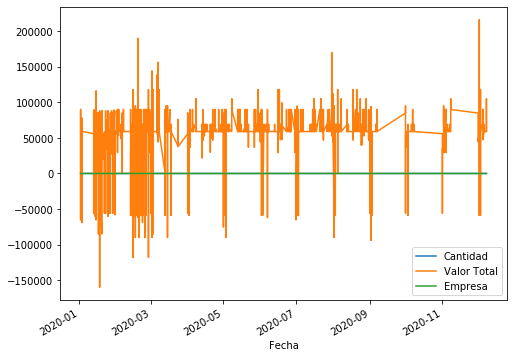

In [32]:
ventas20.plot('Fecha')

In [34]:
ventas20.to_csv('ventas20.csv')